In [1]:
import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import scipy as sp
import matplotlib.pyplot as plt

np.random.seed(1234)
# read data
df = pd.read_csv('retail_price.csv')
index = ['product_category_name', 'product_id']
column_min = ['unit_price', 'product_score', 'freight_price', 'product_weight_g', 'comp_1', 'ps1', 'comp_2', 'ps2', 'comp_3', 'ps3']
column_sum = ['customers']

In [2]:
table_min = pd.pivot_table(df, values=column_min, index=index,  aggfunc=np.min)
table_min

comp_1      comp_2      comp_3  \
product_category_name product_id                                       
bed_bath_table        bed1         74.000000   39.240000   39.240000   
                      bed2         74.000000   74.000000   39.240000   
                      bed3         74.000000   84.900000   39.240000   
                      bed4         77.933333   44.154444   39.990000   
                      bed5         89.900000  163.398710   45.950000   
computers_accessories computers1   94.900000   94.900000   77.900000   
                      computers2  114.491154  109.900000   77.900000   
                      computers3  139.990000  134.900000   78.712281   
                      computers4  114.491154  139.990000   77.900000   
                      computers5  114.491154  119.900000   77.900000   
                      computers6  114.491154  149.900000   77.900000   
consoles_games        consoles1    19.900000   19.900000   19.900000   
                      consoles2    19.900000   19.900000   19.900000   
cool_stuff            cool1        85.704286   85.704286   29.500000   
                      cool2        89.863333  116.927500   29.500000   
                      cool3        35.000000   29.500000   29.500000   
                      cool4        89.863333  116.927500   29.500000   
                      cool5        89.863333   99.990000   29.500000   
furniture_decor       furniture1   38.400000   35.000000   38.400000   
                      furniture2   69.900000   35.000000   75.000000   
                      furniture3   38.400000   35.000000   38.400000   
                      furniture4   69.900000   35.000000   78.535714   
garden_tools          garden1      49.900000   49.900000   49.900000   
                      garden10     49.900000   49.900000   49.900000   
                      garden2      49.900000   49.900000   49.900000   
                      garden3      49.900000   49.900000   49.900000   
                      garden4      49.900000   49.900000   49.900000   
                      garden5      49.900000   49.900000   49.900000   
                      garden6      49.900000   49.900000   49.900000   
                      garden7      49.900000   49.900000   49.900000   
                      garden8      49.900000   49.900000   49.900000   
                      garden9      49.900000   49.900000   49.900000   
health_beauty         health1      23.397407   79.990000   58.990000   
                      health10     23.990000   79.990000   58.990000   
                      health2      23.397407   79.990000   58.990000   
                      health3      23.990000   79.990000   58.990000   
                      health4      23.990000   79.990000   58.990000   
                      health5      19.990000   79.990000   58.799524   
                      health6      23.990000   79.990000   58.990000   
                      health7      19.990000   64.990000   58.799524   
                      health8      19.990000   79.990000   58.799524   
                      health9      19.990000   19.990000   58.799524   
perfumery             perfumery1   49.990000   56.990000   49.990000   
                      perfumery2   49.990000  116.906667  116.906667   
watches_gifts         watches1    103.792523  105.000000  132.531250   
                      watches2    103.792523  105.000000  132.531250   
                      watches3     78.000000   78.000000  132.531250   
                      watches4    103.792523  105.000000  132.531250   
                      watches5    103.792523  105.000000  132.531250   
                      watches6    103.792523  105.000000  132.531250   
                      watches7    103.792523  105.000000  132.531250   
                      watches8    103.792523  105.000000  132.531250   

                                  freight_price  product_score  \
product_category_name product_id                                 
bed_bath_table   

In [3]:
(df.iloc[:100])

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.90,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.90,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.90,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.90,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.90,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,perfumery1,perfumery,01-08-2017,7,398.93,13.588571,56.99,54,1536,2,...,56.99,4.3,13.588571,142.500000,4.4,15.750000,56.99,4.3,13.588571,56.99
96,perfumery1,perfumery,01-09-2017,17,968.83,13.741176,56.99,54,1536,2,...,56.99,4.3,13.741176,142.500000,4.4,9.190000,56.99,4.3,13.741176,56.99
97,perfumery1,perfumery,01-10-2017,17,968.83,12.292941,56.99,54,1536,2,...,56.99,4.3,12.292941,142.500000,4.4,17.150000,56.99,4.3,12.292941,56.99
98,perfumery1,perfumery,01-11-2017,20,1139.80,12.714000,56.99,54,1536,2,...,56.99,4.3,12.714000,118.050000,4.4,14.293750,56.99,4.3,12.714000,56.99


In [4]:
df['product_id'].nunique()

52

In [5]:
df['product_id'].unique()

array(['bed1', 'garden5', 'consoles1', 'garden7', 'health9', 'cool4',
       'health3', 'perfumery1', 'cool5', 'health8', 'garden4',
       'computers5', 'garden10', 'computers6', 'health6', 'garden6',
       'health10', 'watches2', 'health1', 'garden8', 'garden9',
       'watches6', 'cool3', 'perfumery2', 'cool2', 'computers1',
       'consoles2', 'health5', 'watches8', 'furniture4', 'watches5',
       'health7', 'bed3', 'garden3', 'bed2', 'furniture3', 'watches4',
       'watches3', 'furniture2', 'garden2', 'furniture1', 'health2',
       'garden1', 'cool1', 'computers4', 'watches7', 'computers3',
       'health4', 'watches1', 'computers2', 'bed4', 'bed5'], dtype=object)

In [6]:
health1_df = df[df['product_id']=='health1']
health4_df = df[df['product_id']=='health4']
health2_df = df[df['product_id']=='health2']
health7_df = df[df['product_id']=='health7']

In [7]:
health = []
garden = []
console = []
watches = []
cool = []
bed = []
computer = []
perfumery = []


In [8]:
type_k = df['product_id'].unique()
for i in type_k:
    if "health" in i:
        health.append(i)
    if "garden" in i:
        garden.append(i)
    if "console" in i:
        console.append(i)
    if "watches" in i:
        watches.append(i)
    if "cool" in i:
        cool.append(i)
    if "bed" in i:
        bed.append(i)
    if "computer" in i:
        computer.append(i)
    if "perfumery" in i:
        perfumery.append(i)

In [9]:
df.iloc[0]

product_id                              bed1
product_category_name         bed_bath_table
month_year                        01-05-2017
qty                                        1
total_price                            45.95
freight_price                           15.1
unit_price                             45.95
product_name_lenght                       39
product_description_lenght               161
product_photos_qty                         2
product_weight_g                         350
product_score                            4.0
customers                                 57
weekday                                   23
weekend                                    8
holiday                                    1
month                                      5
year                                    2017
s                                  10.267394
volume                                  3800
comp_1                                  89.9
ps1                                      3.9
fp1       

In [10]:
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression




X = df[['qty', 'volume', 'product_weight_g','fp1','fp2','fp3']]  
y = df['freight_price'] 


model = LinearRegression()


model.fit(X, y)


print("regression coef:", model.coef_)
print("intercept:", model.intercept_)


regression coef: [-5.79082277e-02 -5.16579875e-05  2.55371881e-03  7.25291370e-02
  3.50075889e-01  1.16122879e-01]
intercept: 7.400948265262363


In [12]:

X = df[['qty', 'volume', 'product_weight_g','fp1','fp2','fp3','freight_price']]  
y = df['total_price'] 


model = LinearRegression()


model.fit(X, y)


print("regression coef:", model.coef_)
print("intercept:", model.intercept_)

regression coef: [ 8.49382039e+01 -2.89053039e-02  4.15670923e-02 -5.71054087e+00
  1.55947177e+01 -2.80977133e+01  2.20842173e+01]
intercept: 286.7934739942782


In [13]:
X = df[['qty', 'volume', 'product_weight_g','fp1','fp2','fp3','freight_price']]  
y = df['total_price']  


model = LinearRegression()


model.fit(X, y)


print("regression coef:", model.coef_)
print("intercept:", model.intercept_)

regression coef: [ 8.49382039e+01 -2.89053039e-02  4.15670923e-02 -5.71054087e+00
  1.55947177e+01 -2.80977133e+01  2.20842173e+01]
intercept: 286.7934739942782


In [14]:
np.random.seed(1234)
# read data
df = pd.read_csv('retail_price.csv')
index = ['product_category_name', 'product_id']
column_min = ['unit_price', 'product_score', 'freight_price', 'product_weight_g', 'comp_1', 'ps1', 'comp_2', 'ps2', 'comp_3', 'ps3']
# column_max = []
column_sum = ['customers']

table_min = pd.pivot_table(df, values=column_min, index=index,  aggfunc=np.min)
table_sum = pd.pivot_table(df, values=column_sum, index=index, aggfunc=np.sum)
table = table_min.merge(table_sum, on=index,how='left')
table

# Selling & Buying & Rating & Probability of buying
product_category = ['bed_bath_table', 'computers_accessories', 'consoles_games', 'cool_stuff', 'furniture_decor']

selling = {}
for category in product_category:
    selling[category] = (table.loc[category]['unit_price'].values)

# we set the margin as a uniform % 
buying = {}
for category in product_category:
    buying[category] = selling[category] * np.random.uniform(0.6,0.7, size = len(selling[category]))


rating = {}
for category in product_category:
    rating[category] = (table.loc[category]['product_score'].values)
MAX_RATING = 5.

# Customers
n_customers = {}
for category in product_category:
    n_customers[category] = (table.loc[category]['customers'].sum())

weights = {}
for category in product_category:
    weights[category] = (table.loc[category]['product_weight_g'].values)

softmax={}
for category in product_category:
    softmax[category] = (np.exp(-selling[category]*(MAX_RATING - rating[category]) / 100) 
              / np.sum(np.exp(-selling[category]*(MAX_RATING - rating[category])/100)))

prop_customers = softmax['computers_accessories']
max_customers = n_customers['computers_accessories'] *prop_customers


In [15]:
# fixed freight cost, can change if needed
SHIPPING_COST = 0

# how many customers we have that won't buy unless extra conditions are fufilled
MARKET_CUSTOMERS = {category: n_customers[category] / np.random.uniform(0.4,0.8) for category in product_category}

# what % of 'market' customers do we get for each % of discount?
DISCOUNT_FACTOR = 0

# what % of 'market' customers do we get if we have free shipping
FREE_SHIPPING_FACTOR = 0

# the budget
BUDGET = 1e6

# inventory for each category, we will set this to be a proportion of the number of customers
INVENTORY_SPACE = n_customers['computers_accessories'] * 0.75

BULK_PURCHASE_COST = 1e3
BULK_WEIGHT = 1e4

In [16]:
n_customers 

{'bed_bath_table': 3313,
 'computers_accessories': 4807,
 'consoles_games': 439,
 'cool_stuff': 2168,
 'furniture_decor': 2495}

In [17]:
def run_model():
    m = gp.Model()

    BIGNUM = 1e6 # sum(n_customers.values())

    # decision variables
    stock = {}
    is_chosen = {}
    sold = {}
    discount = {}
    free_shipping = {}
    transport_multiplier = {}
    vars = {
        'stock':stock, 'is_chosen':is_chosen, 'sold':sold, 'discount':discount, 'free_shipping':free_shipping,
    }

    # initialising decision variables
    for category in product_category:
        I = range(len(selling[category]))
        stock[category] = m.addVars(I,vtype = GRB.INTEGER)
        is_chosen[category] = m.addVars(I, vtype = GRB.BINARY)
        sold[category] = m.addVars(I,vtype = GRB.INTEGER)
        discount[category] = m.addVars(I,vtype=GRB.CONTINUOUS, lb=0, ub=1)
        free_shipping[category] = m.addVars(I,  vtype = GRB.BINARY)
        transport_multiplier[category] = m.addVar(vtype = GRB.INTEGER)

    # amount sold and extra customers
    captured_customers = lambda category,i: (
        MARKET_CUSTOMERS[category] * (FREE_SHIPPING_FACTOR * free_shipping[category][i]
                                    + DISCOUNT_FACTOR * discount[category][i])
    )
    amount_sold  = lambda category,i: softmax[category][i]* (n_customers[category] + captured_customers(category,i))

    # objective function
    m.setObjective(
        gp.quicksum(gp.quicksum(sold[category][i] * selling[category][i] * (1 - discount[category][i]) 
                                - stock[category][i] * buying[category][i]
                                - sold[category][i] * SHIPPING_COST * free_shipping[category][i]
                    for i in range(len(selling[category]))) 
                    - BULK_PURCHASE_COST * transport_multiplier[category] for category in product_category),
        GRB.MAXIMIZE
    )

    # Can't store past inventory space
    m.addConstrs( gp.quicksum(stock[category][i] for i in range(len(selling[category]))) <= INVENTORY_SPACE 
                for category in product_category)

    # Can't buy more than the budget
    m.addConstr(gp.quicksum( gp.quicksum(stock[category][i] * buying[category][i] for i in range(len(selling[category]))) 
                            for category in product_category) <= BUDGET)

    for category in product_category:
        # If a product is stocked, is_chosen is set to be 1 [Change to BIGNUM to remove dependencies on n_customers]
        m.addConstrs(stock[category][i] <= is_chosen[category][i] * BIGNUM
                    for i in range(len(selling[category])))
        # Can't sell more than you have stocked
        m.addConstrs(sold[category][i] <= stock[category][i] for i in range(len(selling[category])))
        # How much we can sell depends on number of customers [Removed is_chosen]
        m.addConstrs(sold[category][i] <= amount_sold(category, i)
                    for i in range(len(selling[category])))
        m.addConstrs((FREE_SHIPPING_FACTOR * free_shipping[category][i]
                                    + DISCOUNT_FACTOR * discount[category][i]) <= 1 for i in range(len(selling[category])))
        m.addConstrs(transport_multiplier[category] >= (1 / BULK_WEIGHT) * gp.quicksum(stock[category][i] * weights[category][i]
                                                                    for i in range(len(selling[category])))
                                                                    for category in product_category)

    m.params.NonConvex = 2
    m.optimize()
    data = {}
    for category in product_category:
        data[category] = {}
        for v in vars:
            data[category][v] = [a.X for a in vars[v][category].values()]
        data[category]['transport_units'] = transport_multiplier[category].X
        data[category]['captured_customers'] = [captured_customers(category, i).getValue() for i in range(len(selling[category]))]
        data[category]['total_sold'] = [amount_sold(category,i).getValue() for i in range(len(selling[category]))]

    return m,data

In [18]:
MARKET_CUSTOMERS

{'bed_bath_table': 7701.919727878018,
 'computers_accessories': 8779.433986623599,
 'consoles_games': 567.7291567613049,
 'cool_stuff': 3282.1071431949727,
 'furniture_decor': 4464.277478038352}

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 119 rows, 115 columns and 333 nonzeros
Model fingerprint: 0xd477e1f0
Model has 44 quadratic objective terms
Variable types: 22 continuous, 93 integer (44 binary)
Coefficient statistics:
  Matrix range     [2e-01, 1e+06]
  Objective range  [1e+01, 2e+02]
  QObjective range [1e+01, 3e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+09]
Found heuristic solution: objective -0.0000000
Presolve removed 118 rows and 113 columns
Presolve time: 0.01s
Presolved: 2 rows, 3 columns, 5 nonzeros
Found heuristic solution: objective 523184.54568
Variable types: 0 continuous, 3 integer (1 binary)
Found heuristic solution: objective 540063.62538

Root relaxation: objective 5.548911e+05, 2 iteratio

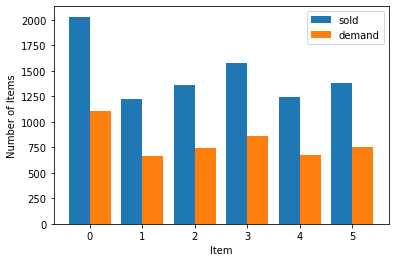

In [38]:
BUDGET = 1e9

# inventory for each category, we will set this to be a proportion of the number of customers
INVENTORY_SPACE = n_customers['computers_accessories'] * 100
MARKET_CUSTOMERS = {category: 20000 for category in product_category}
BULK_PURCHASE_COST = 0
SHIPPING_COST = 7.4
BULK_WEIGHT = 1
FREE_SHIPPING_FACTOR = 0.2

m,data = run_model()
# the budget

sold_items = data['computers_accessories']['sold']
plt.bar(np.arange(6) - 0.2, sold_items, 0.4, label = 'sold')
plt.bar(np.arange(6) + 0.2, max_customers, 0.4, label = 'demand')
plt.legend()
plt.xlabel("Item")
plt.ylabel("Number of Items")
print("Total amount sold: ", np.sum(sold_items))

In [34]:
profit = [4.192753834611e+05,5.548911153483e+05,7.003848146227e+05,8.481816675230e+05,9.960686050837e+05,1.143931773156e+06, 1.291843756826e+06,1.439732298207e+06,1.587556118827e+06]
sold_amount =[6062,8805,10804,12804,14804,16804.0,18804,20804,22803]
fac = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

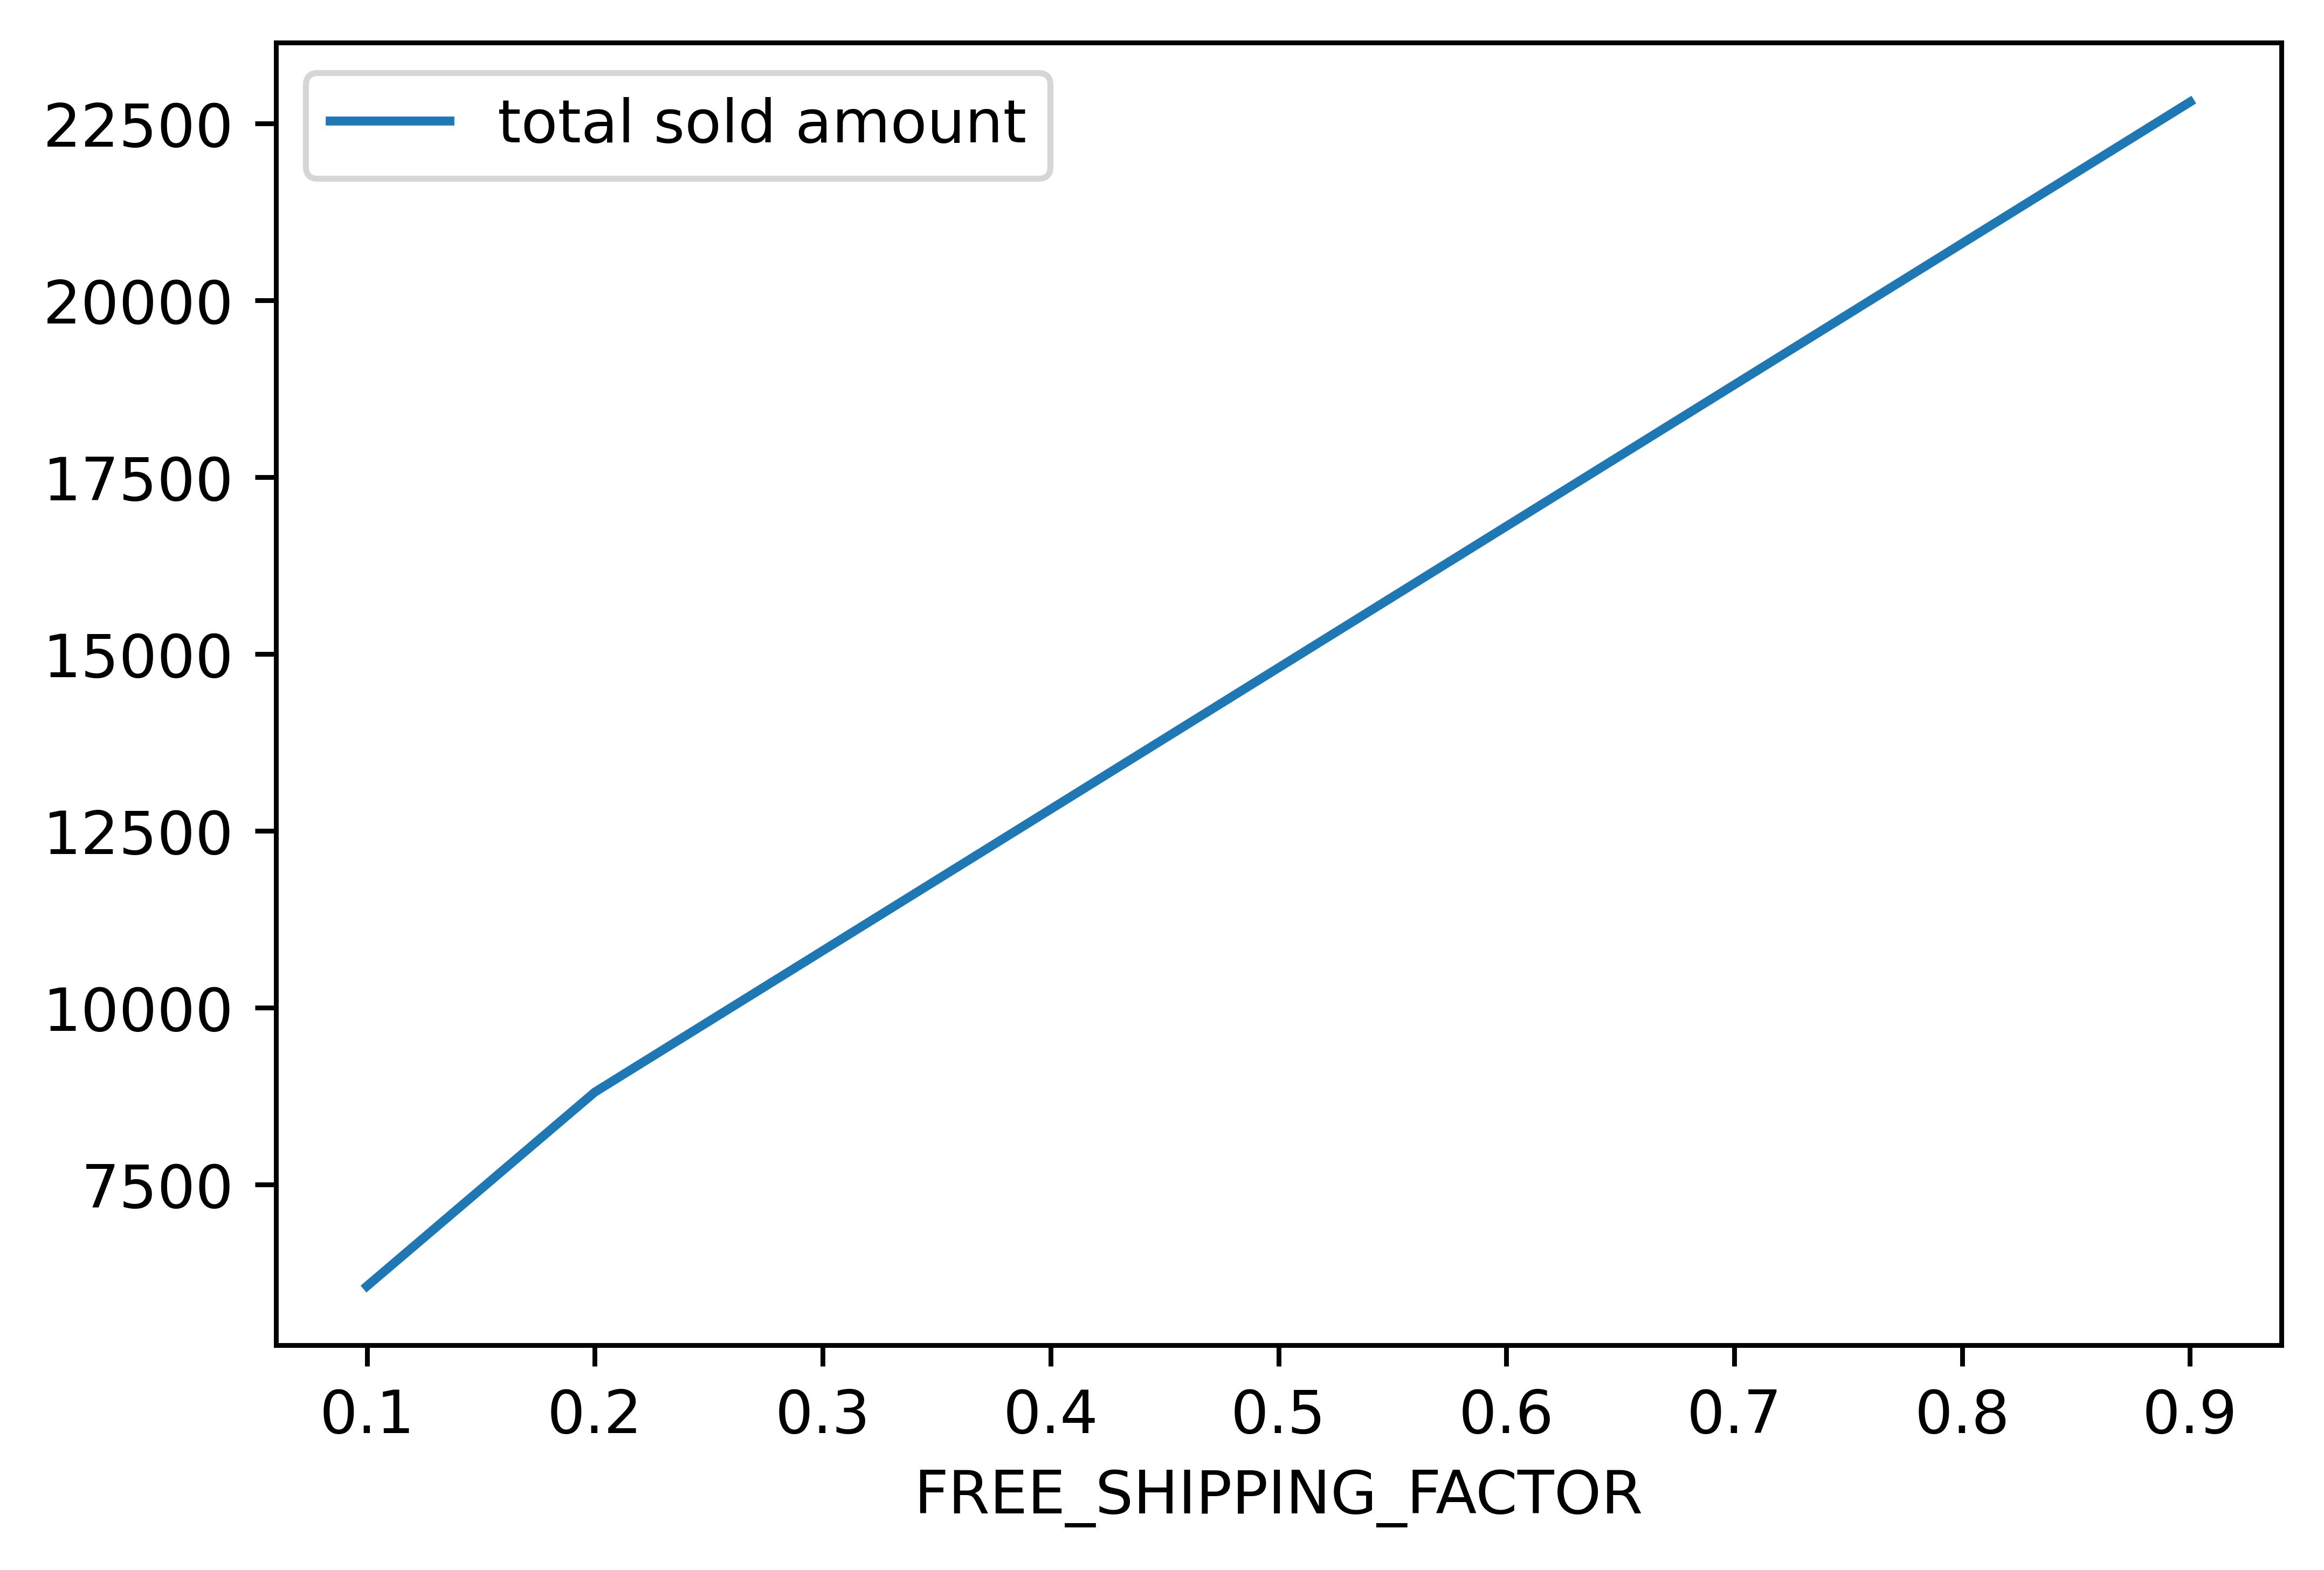

In [35]:
import matplotlib.pyplot as plt


plt.figure(dpi=800)
plt.plot(fac,sold_amount , label='total sold amount')
#plt.plot(fac, profit, label='profit')


plt.legend()
#plt.title("Para")

plt.xlabel("FREE_SHIPPING_FACTOR")
plt.show()

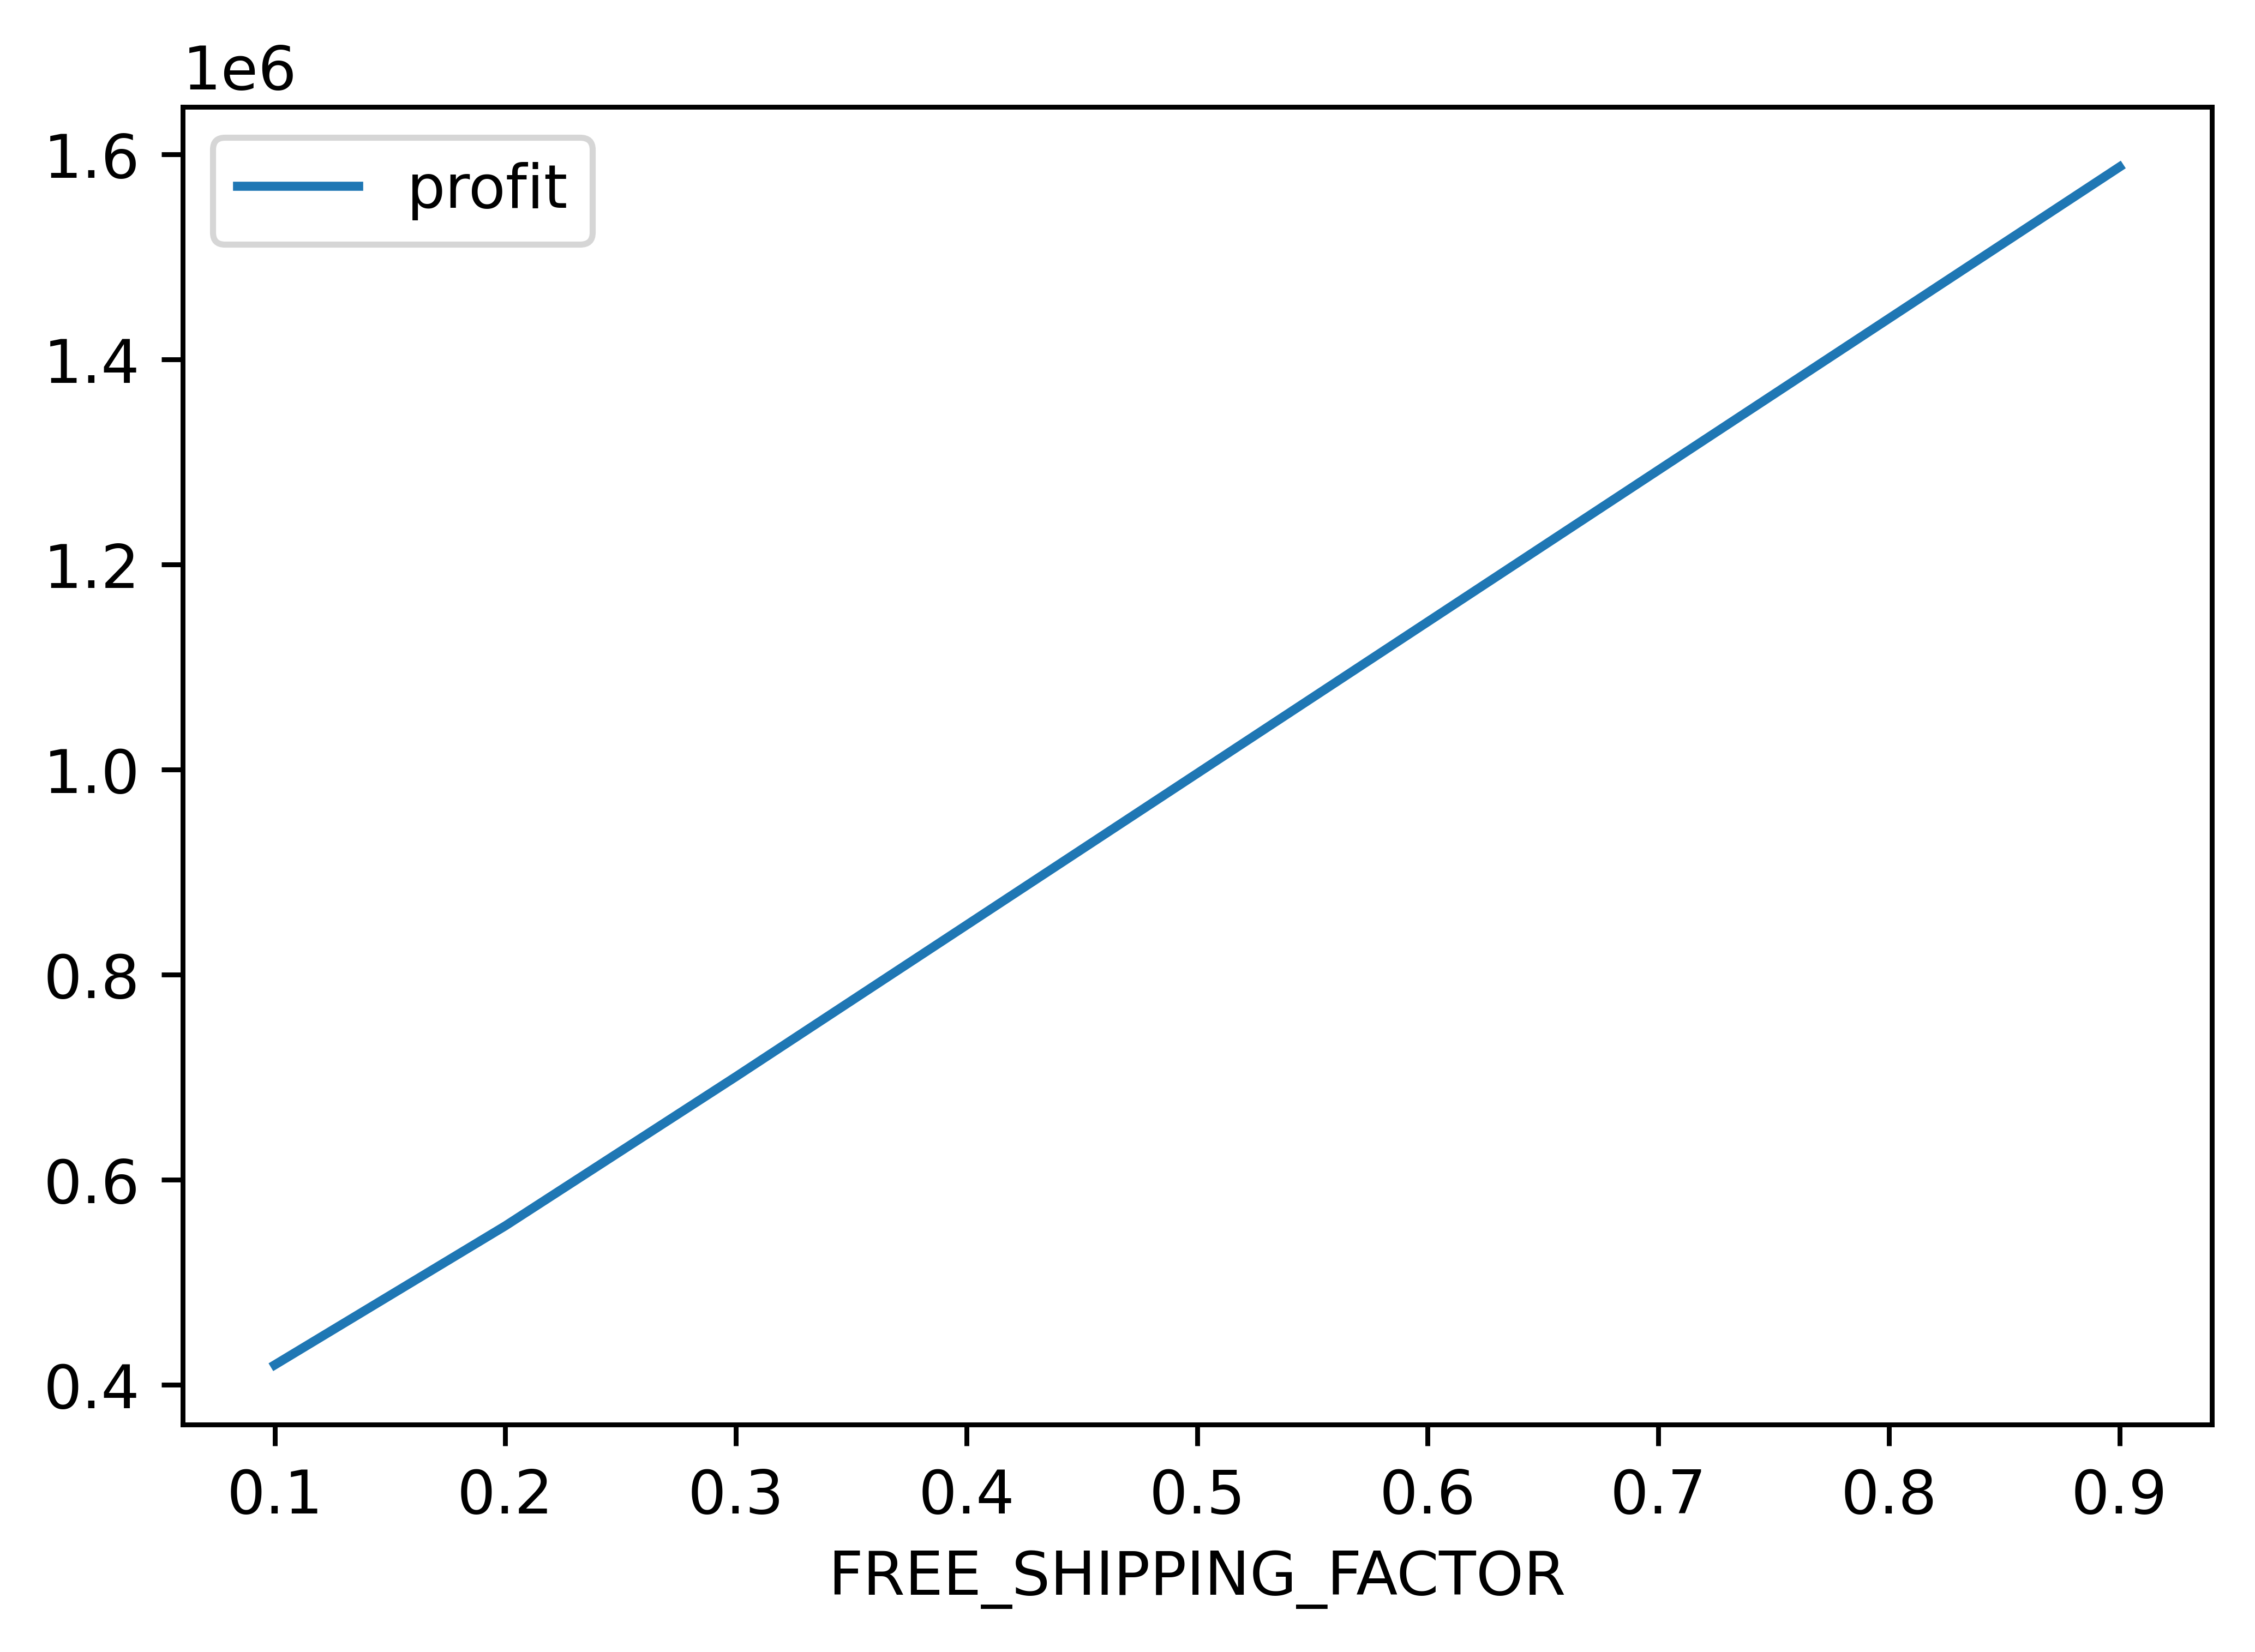

In [39]:
import matplotlib.pyplot as plt


plt.figure(dpi=800)
#plt.plot(fac,sold_amount , label='total sold amount')
plt.plot(fac, profit, label='profit')


plt.legend()
#plt.title("Para")

plt.xlabel("FREE_SHIPPING_FACTOR")
plt.show()

In [24]:
def calculate_slope(x1, y1, x2, y2):
    return (y2 - y1) / (x2 - x1)

In [76]:
import matplotlib.pyplot as plt

def plot_scatter(data):
    x = [i / 10 + 0.2 for i in range(len(data))]  # 将 x 值除以十
    y = [val / 10 for val in data]  # 将 y 值除以十

    plt.scatter(x, y)
    plt.xlabel('shipping factor')
    plt.ylabel('gradient')
    plt.title('Scatter Plot')
    plt.figure(dpi=800)
    plt.show()



In [77]:
slope= []

for i in range(len(fac)):
    if(i+1 == len(fac)):
        break;
    slope.append(calculate_slope(fac[i],sold_amount[i],fac[i+1],sold_amount[i+1]))
    


In [78]:
slope

[27430.0,
 19990.000000000004,
 19999.999999999993,
 20000.000000000004,
 20000.000000000004,
 20000.000000000004,
 19999.99999999998,
 19990.000000000004]

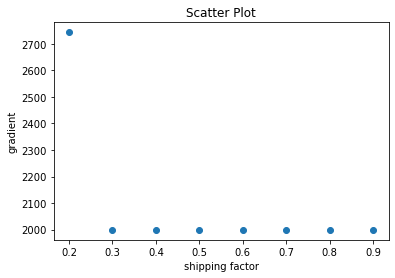

<Figure size 4800x3200 with 0 Axes>

In [79]:
plot_scatter(slope)

In [80]:
1.587556118827e+06

1587556.118827